In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.shape

(300, 2)

In [8]:
df=df.rename(columns={'Rebound Signal Strength nHz':'Signal',
             'Rock Density kg/m3':'Density'})

In [9]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='Signal', ylabel='Density'>

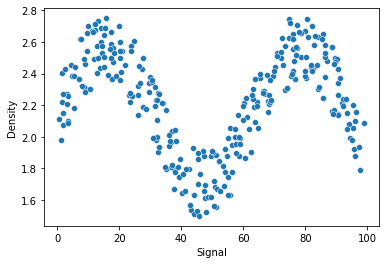

In [10]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [18]:
X=df[['Signal']].values

In [19]:
y=df['Density']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr_model=LinearRegression()

In [24]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [25]:
pred=lr_model.predict(X_test)

In [28]:
pred.shape

(30,)

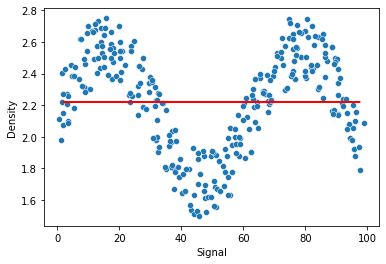

In [40]:
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(X_test, pred,'r')

In [31]:
pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mean_absolute_error(y_test,pred)

0.211198973318633

In [34]:
np.sqrt(mean_squared_error(y_test,pred))

0.2570051996584629

In [47]:
signal_range=np.arange(0,100)

In [48]:
signal_range.shape

(100,)

In [49]:
signal_pred=lr_model.predict(signal_range.reshape(-1,1))

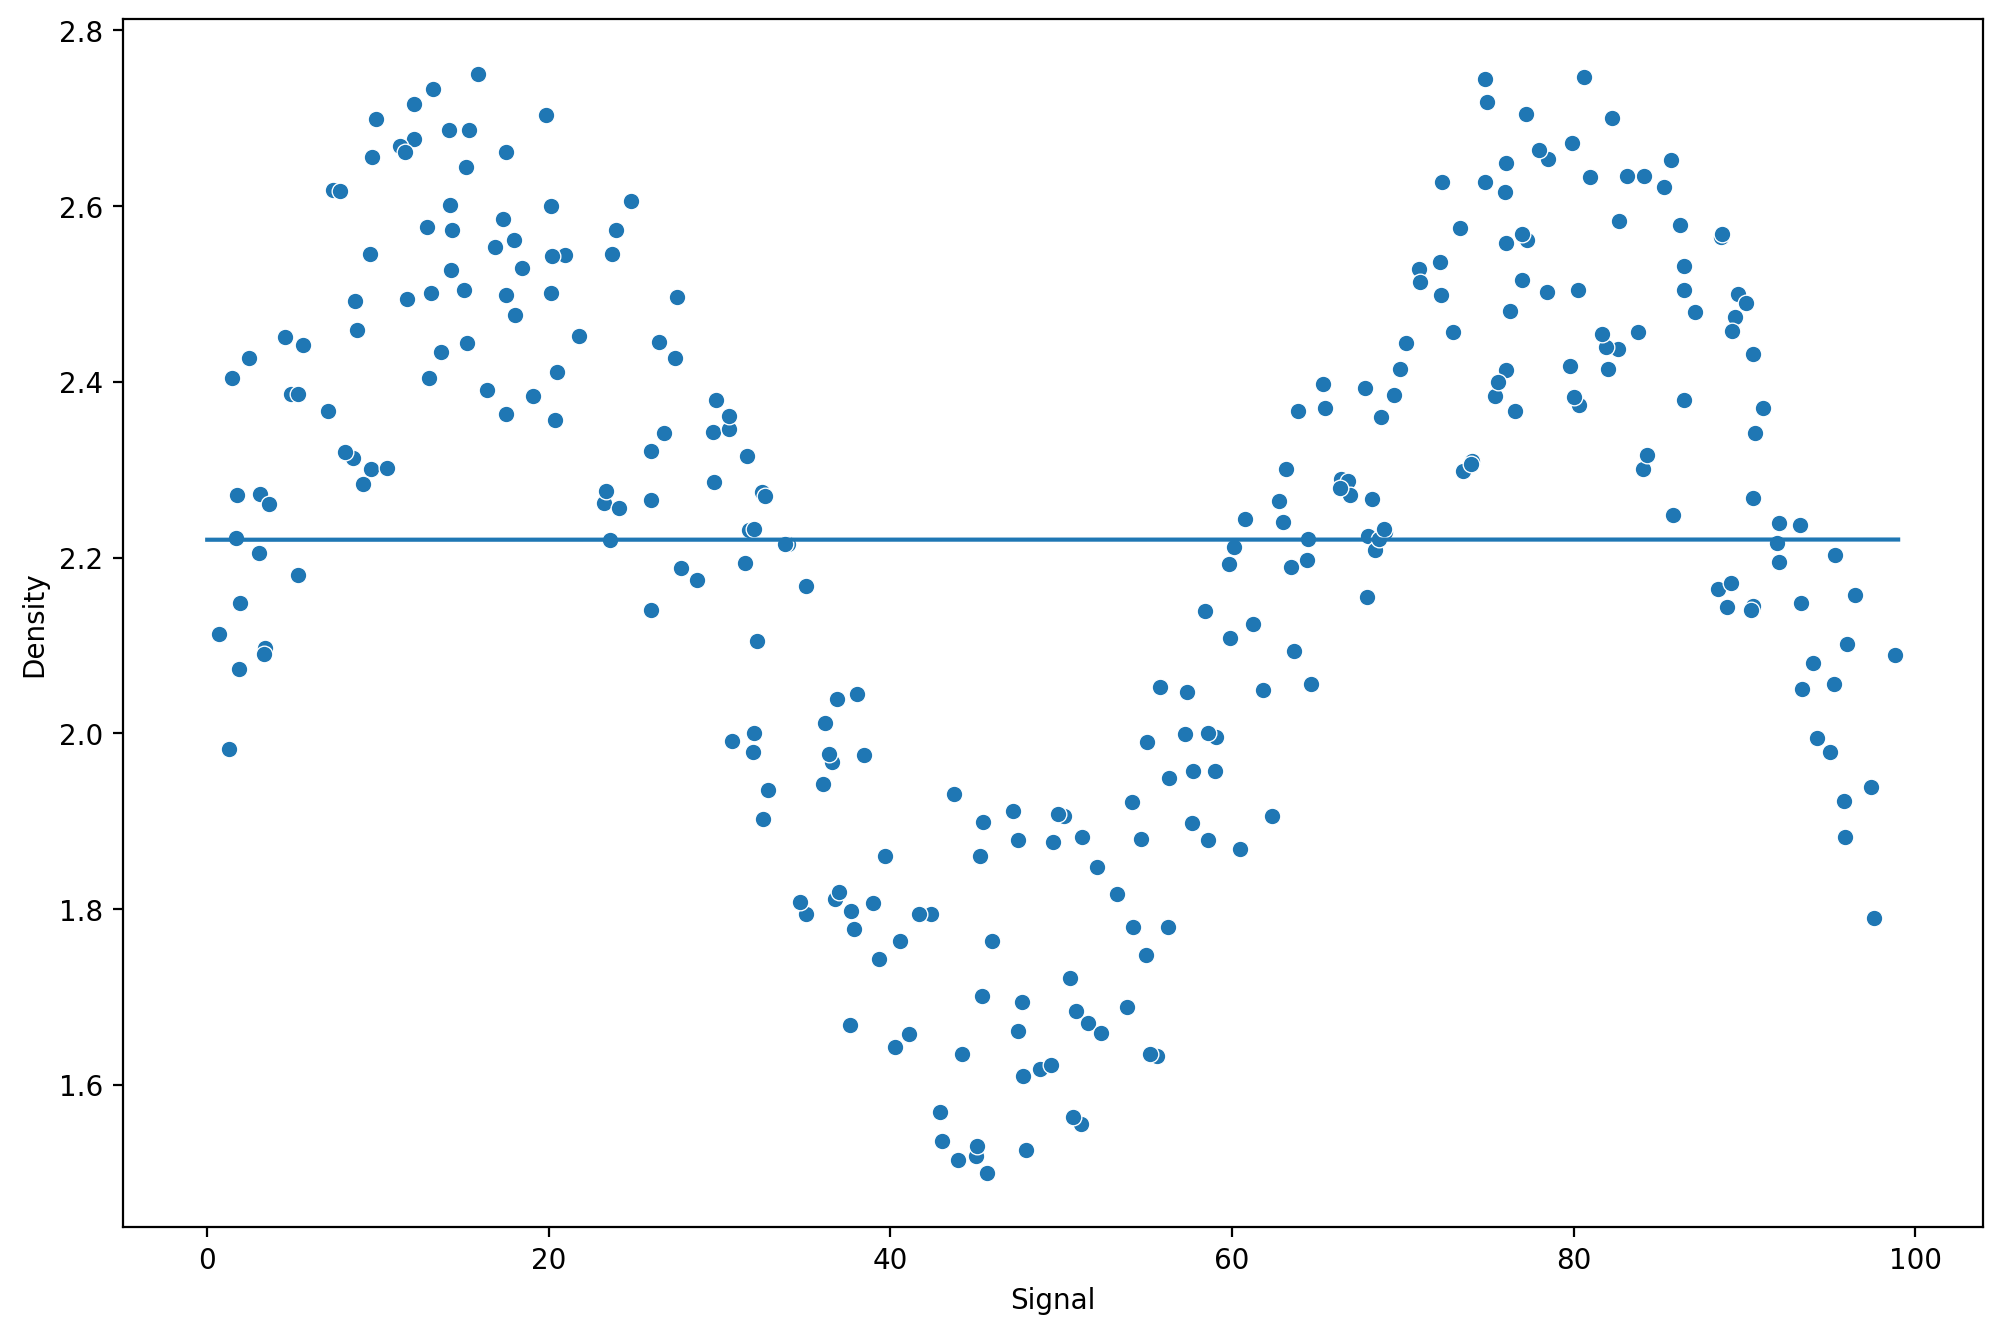

In [50]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(signal_range,signal_pred)

In [51]:
signal_pred

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

In [68]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    mae=mean_absolute_error(y_test,pred)
    print(f"MAE:{mae}")
    print(f"RMSE:{rmse}")
    
    signal_range=np.arange(0,100)
    signal_pred=model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal', y='Density',data=df,color='black')
    plt.plot(signal_range,signal_pred)

MAE:0.211198973318633
RMSE:0.2570051996584629


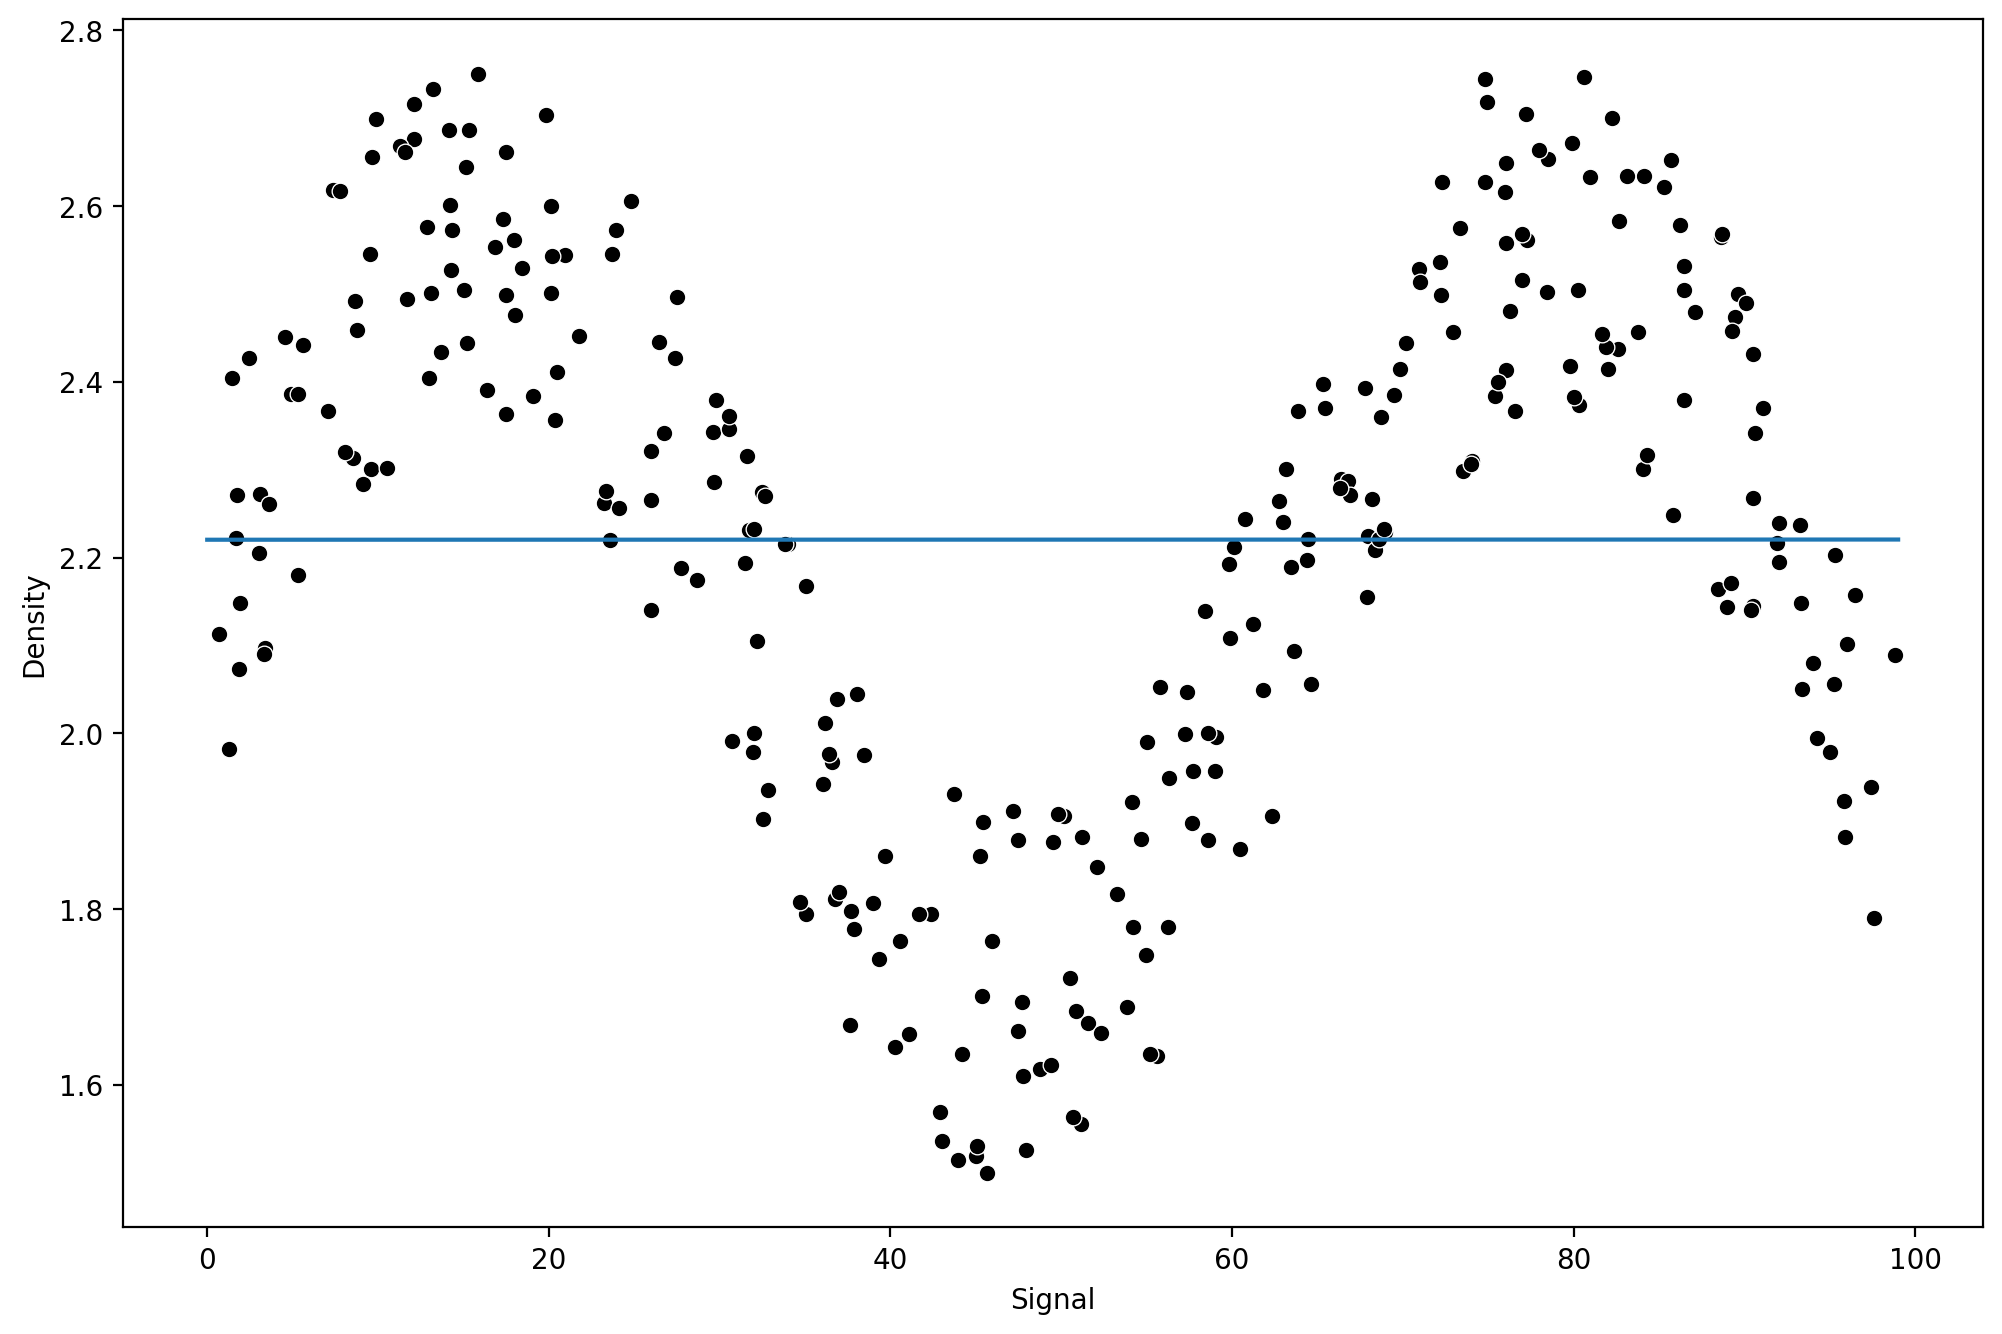

In [69]:
run_model(LinearRegression(),X_train,y_train,X_test,y_test)

In [70]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pipe=make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE:0.11969110249675548
RMSE:0.13807422328078475


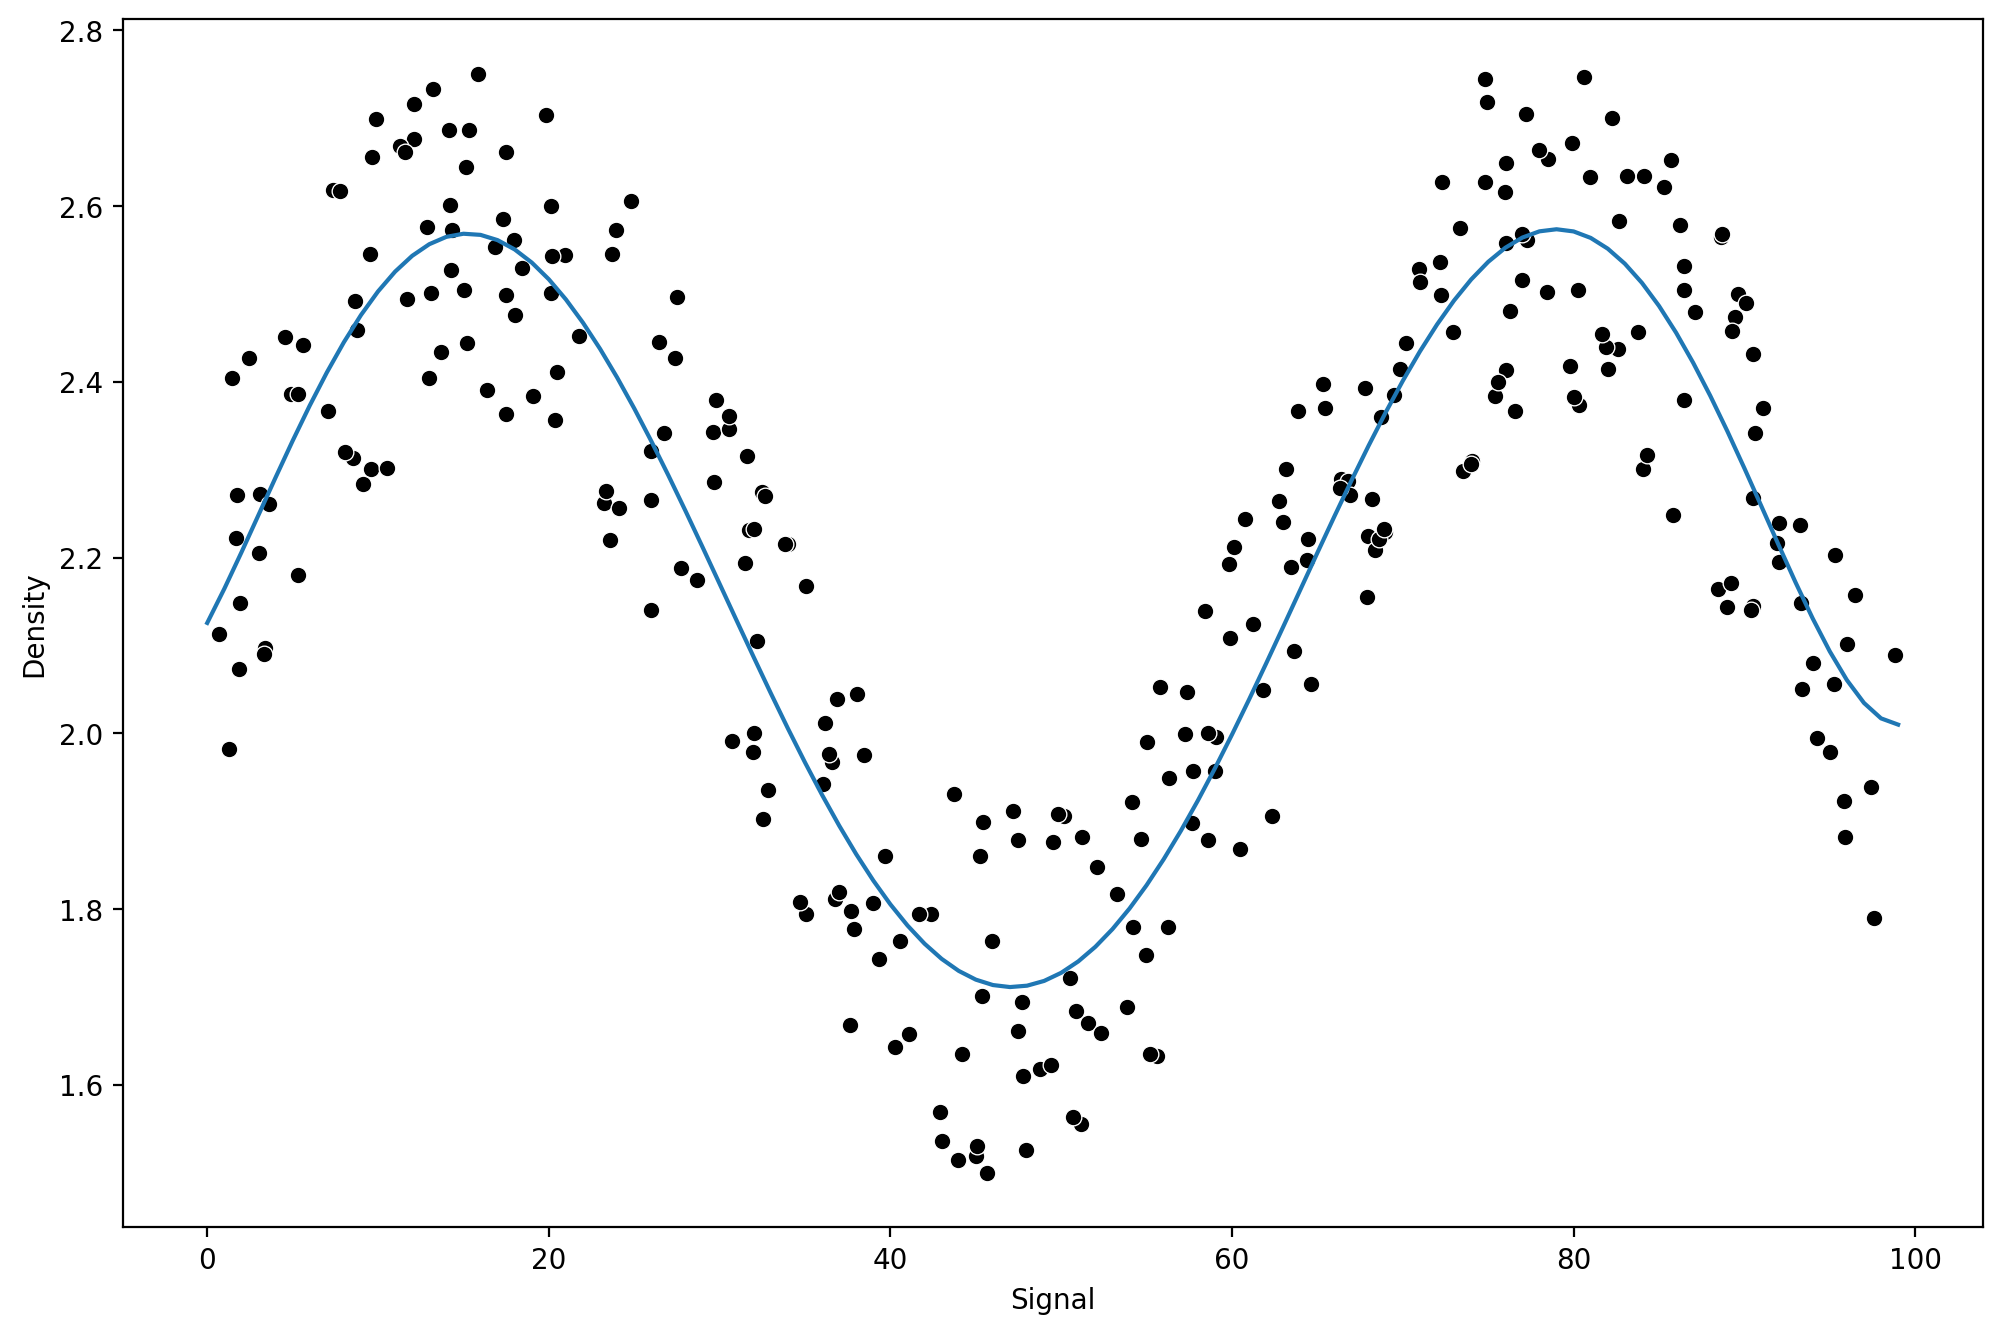

In [76]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [78]:
from sklearn.neighbors import KNeighborsRegressor

MAE:0.13363165935705318
RMSE:0.15954234753677107


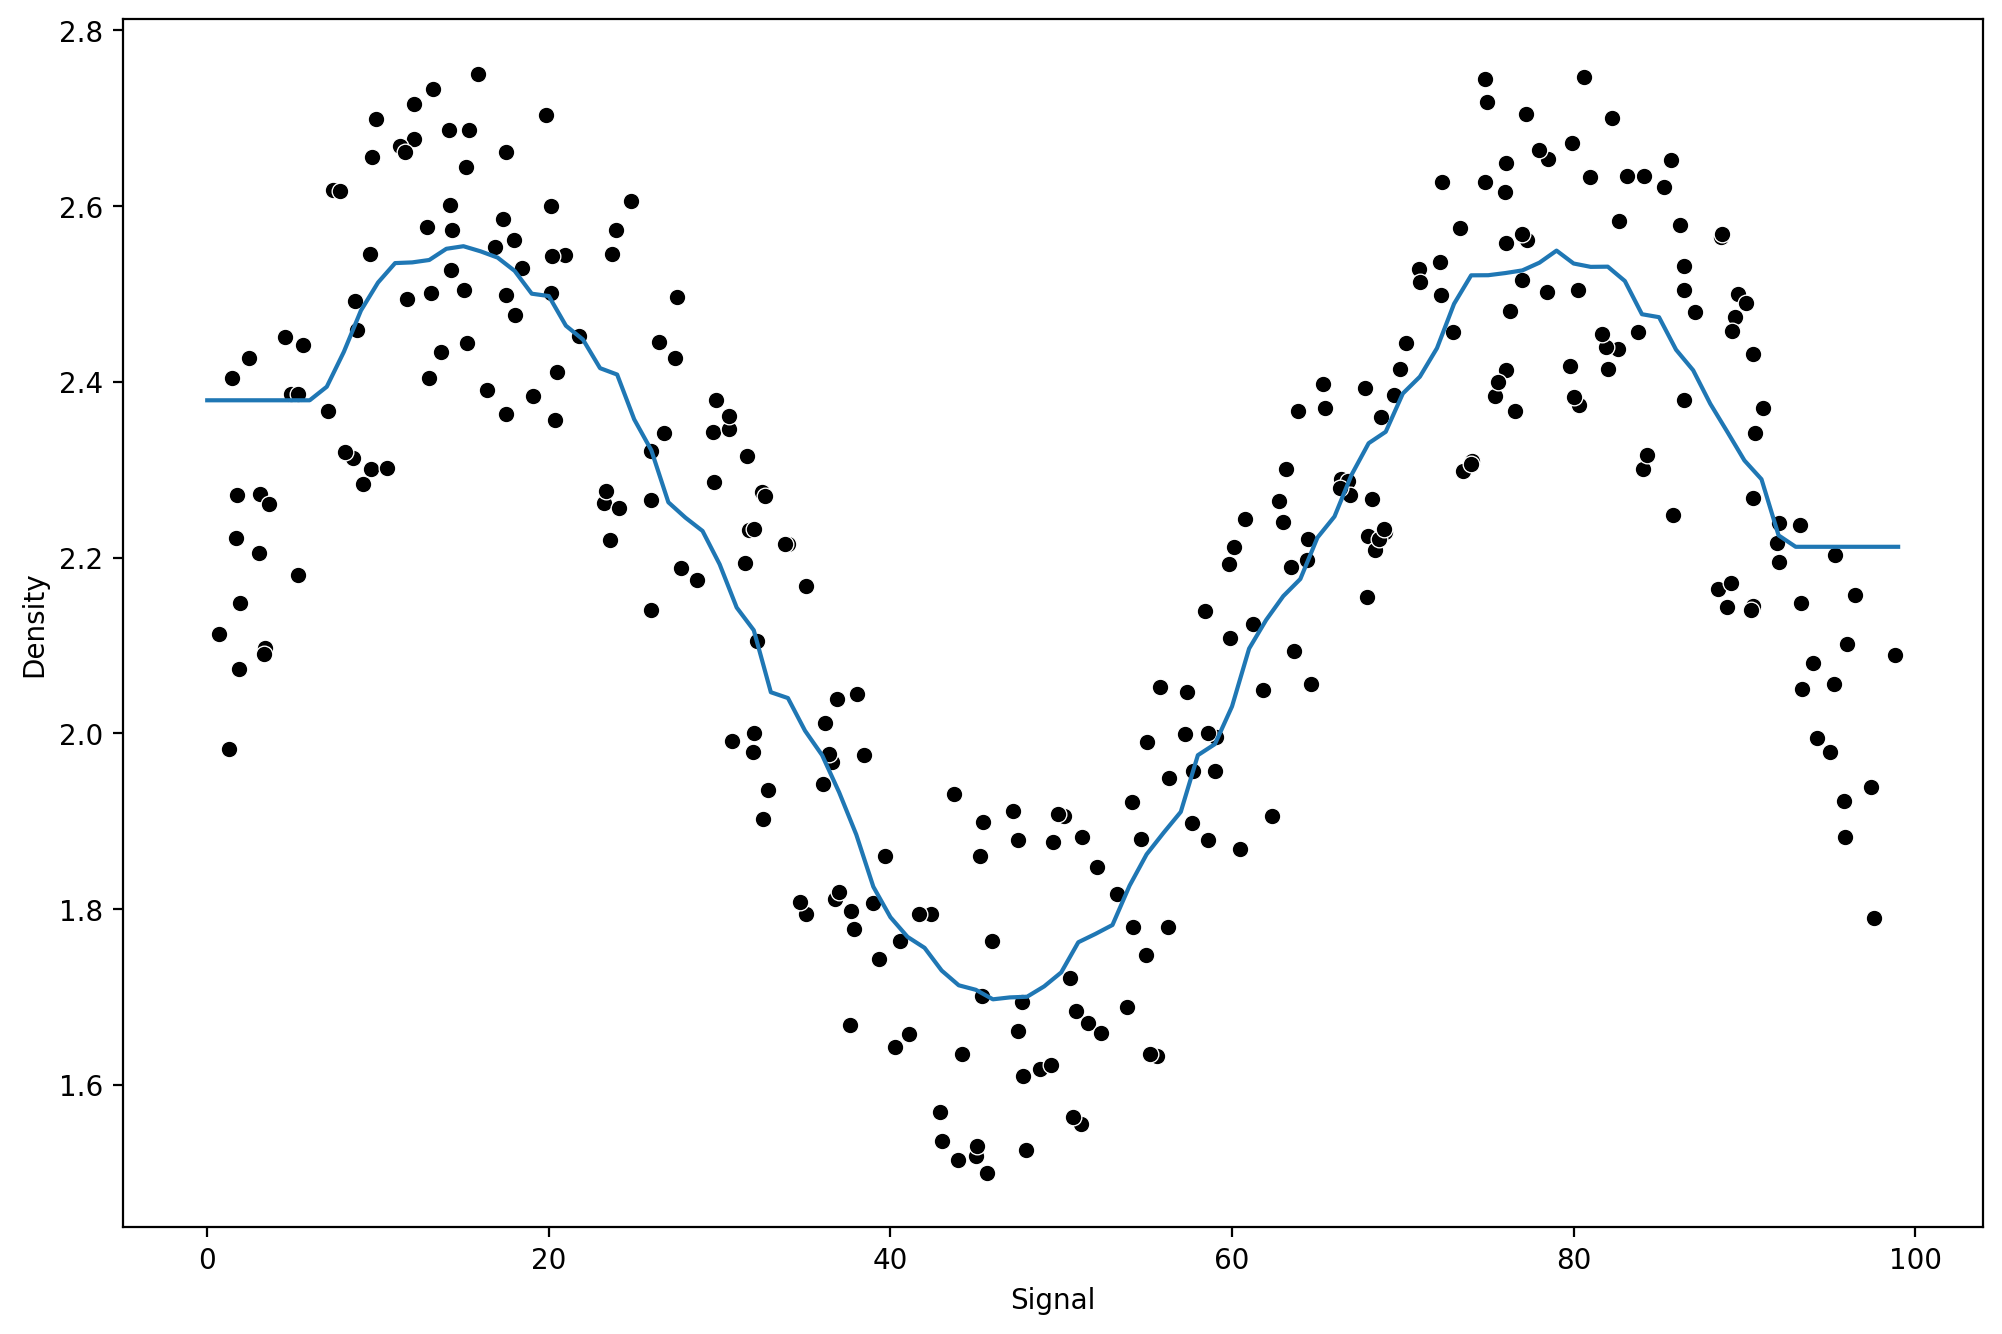

In [87]:
k_values=[30]

for k in k_values:
    model=KNeighborsRegressor(n_neighbors=k)
    run_model(model,X_train,y_train,X_test,y_test)    

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
tree=DecisionTreeRegressor()

MAE:0.11877297474442378
RMSE:0.1523487028635337


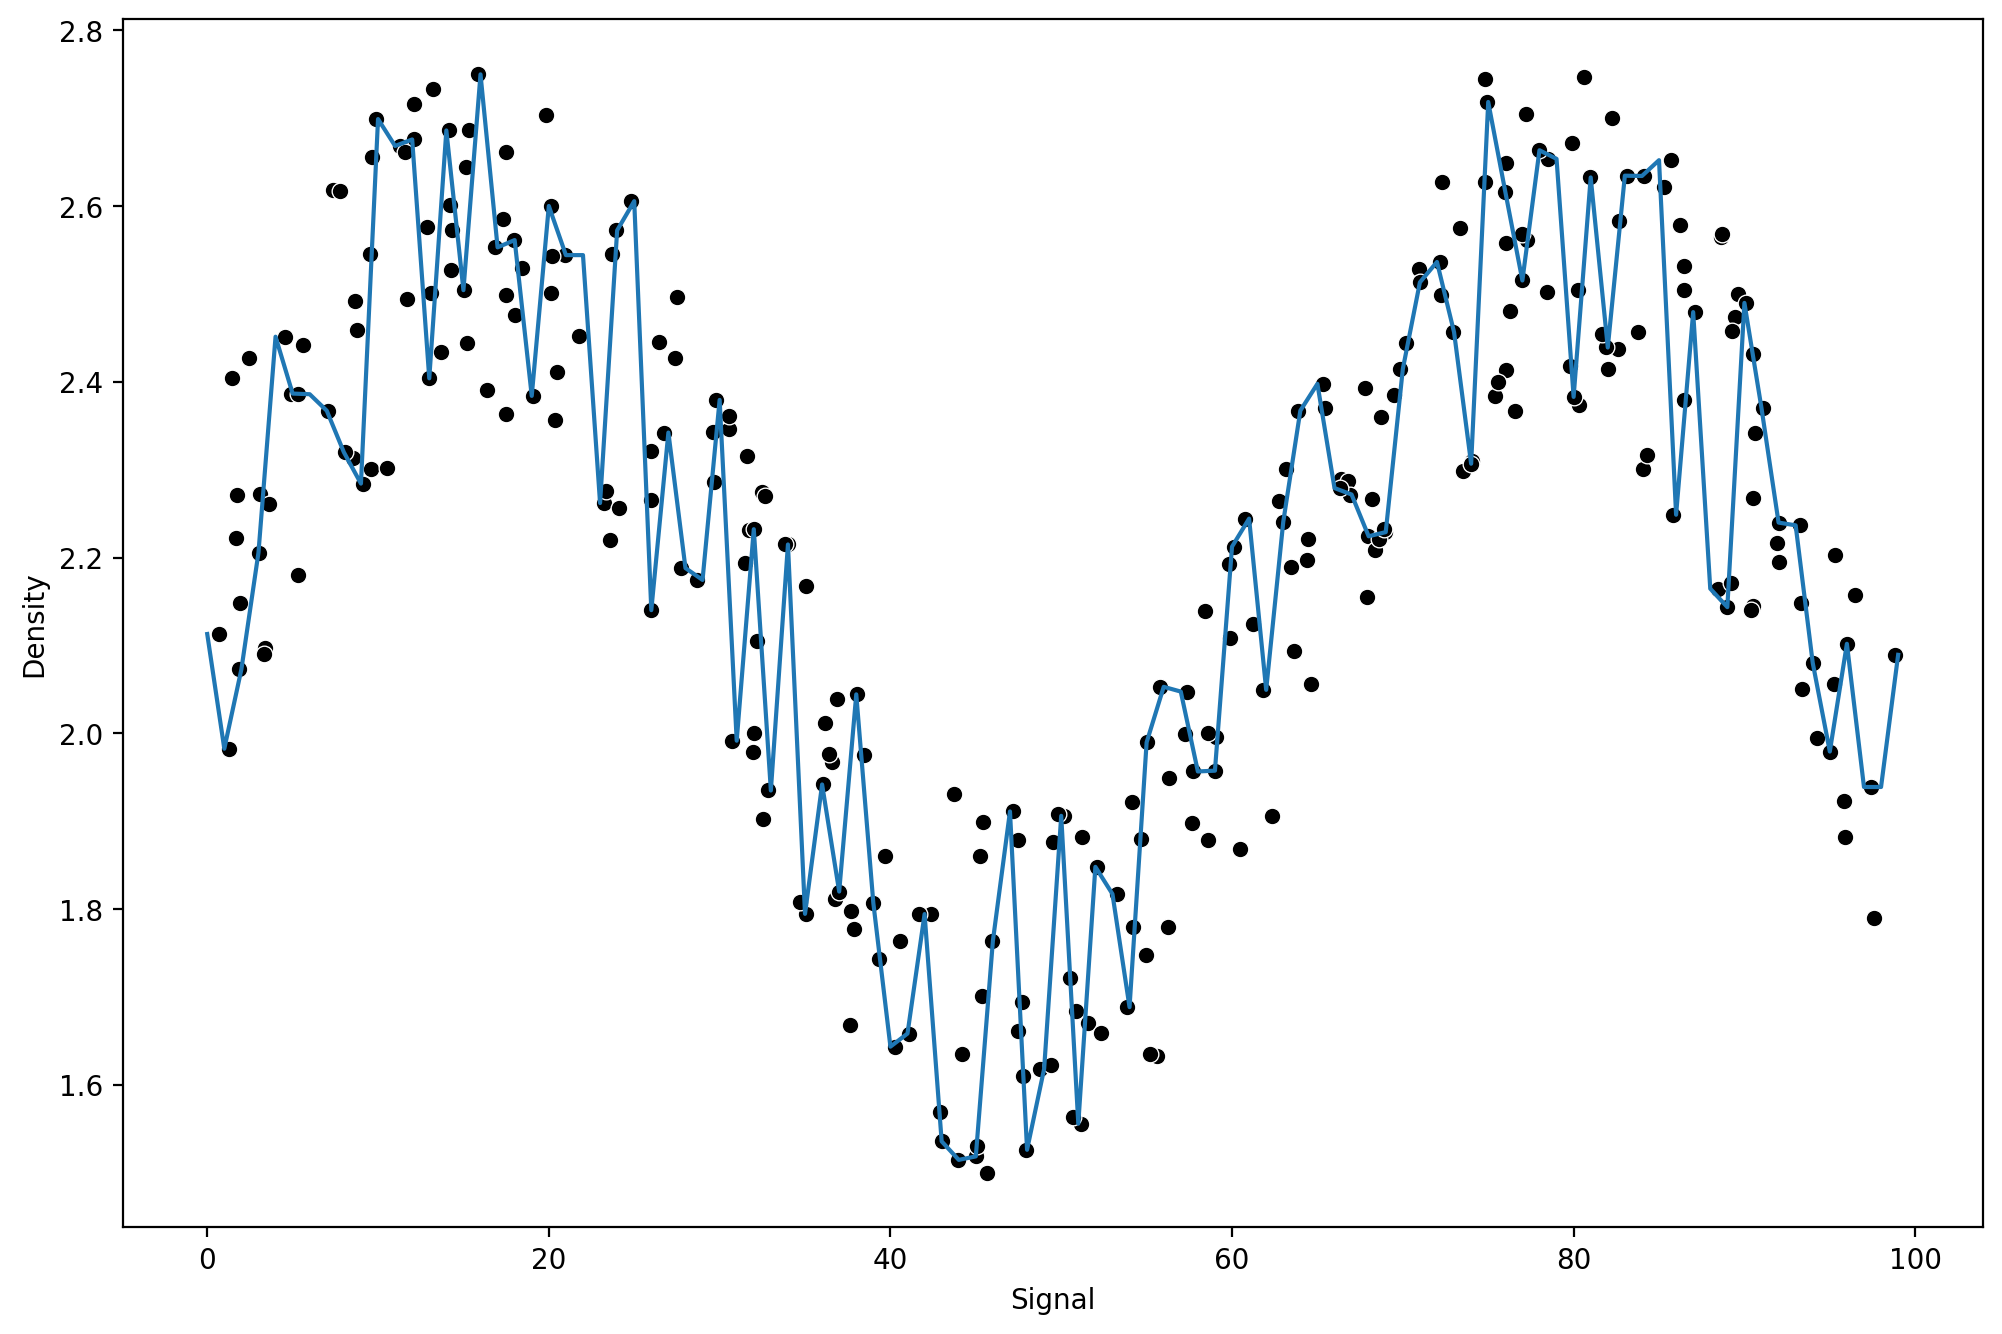

In [90]:
run_model(tree,X_train,y_train,X_test,y_test)

In [91]:
from sklearn.svm import SVR

In [94]:
svr=SVR()

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid={'C':[0.01,0.1,1,5,10,100,1000],
           'gamma':['auto','scale']}

In [95]:
grid=GridSearchCV(svr, param_grid)

MAE:0.10854210121355189
RMSE:0.1264699930205005


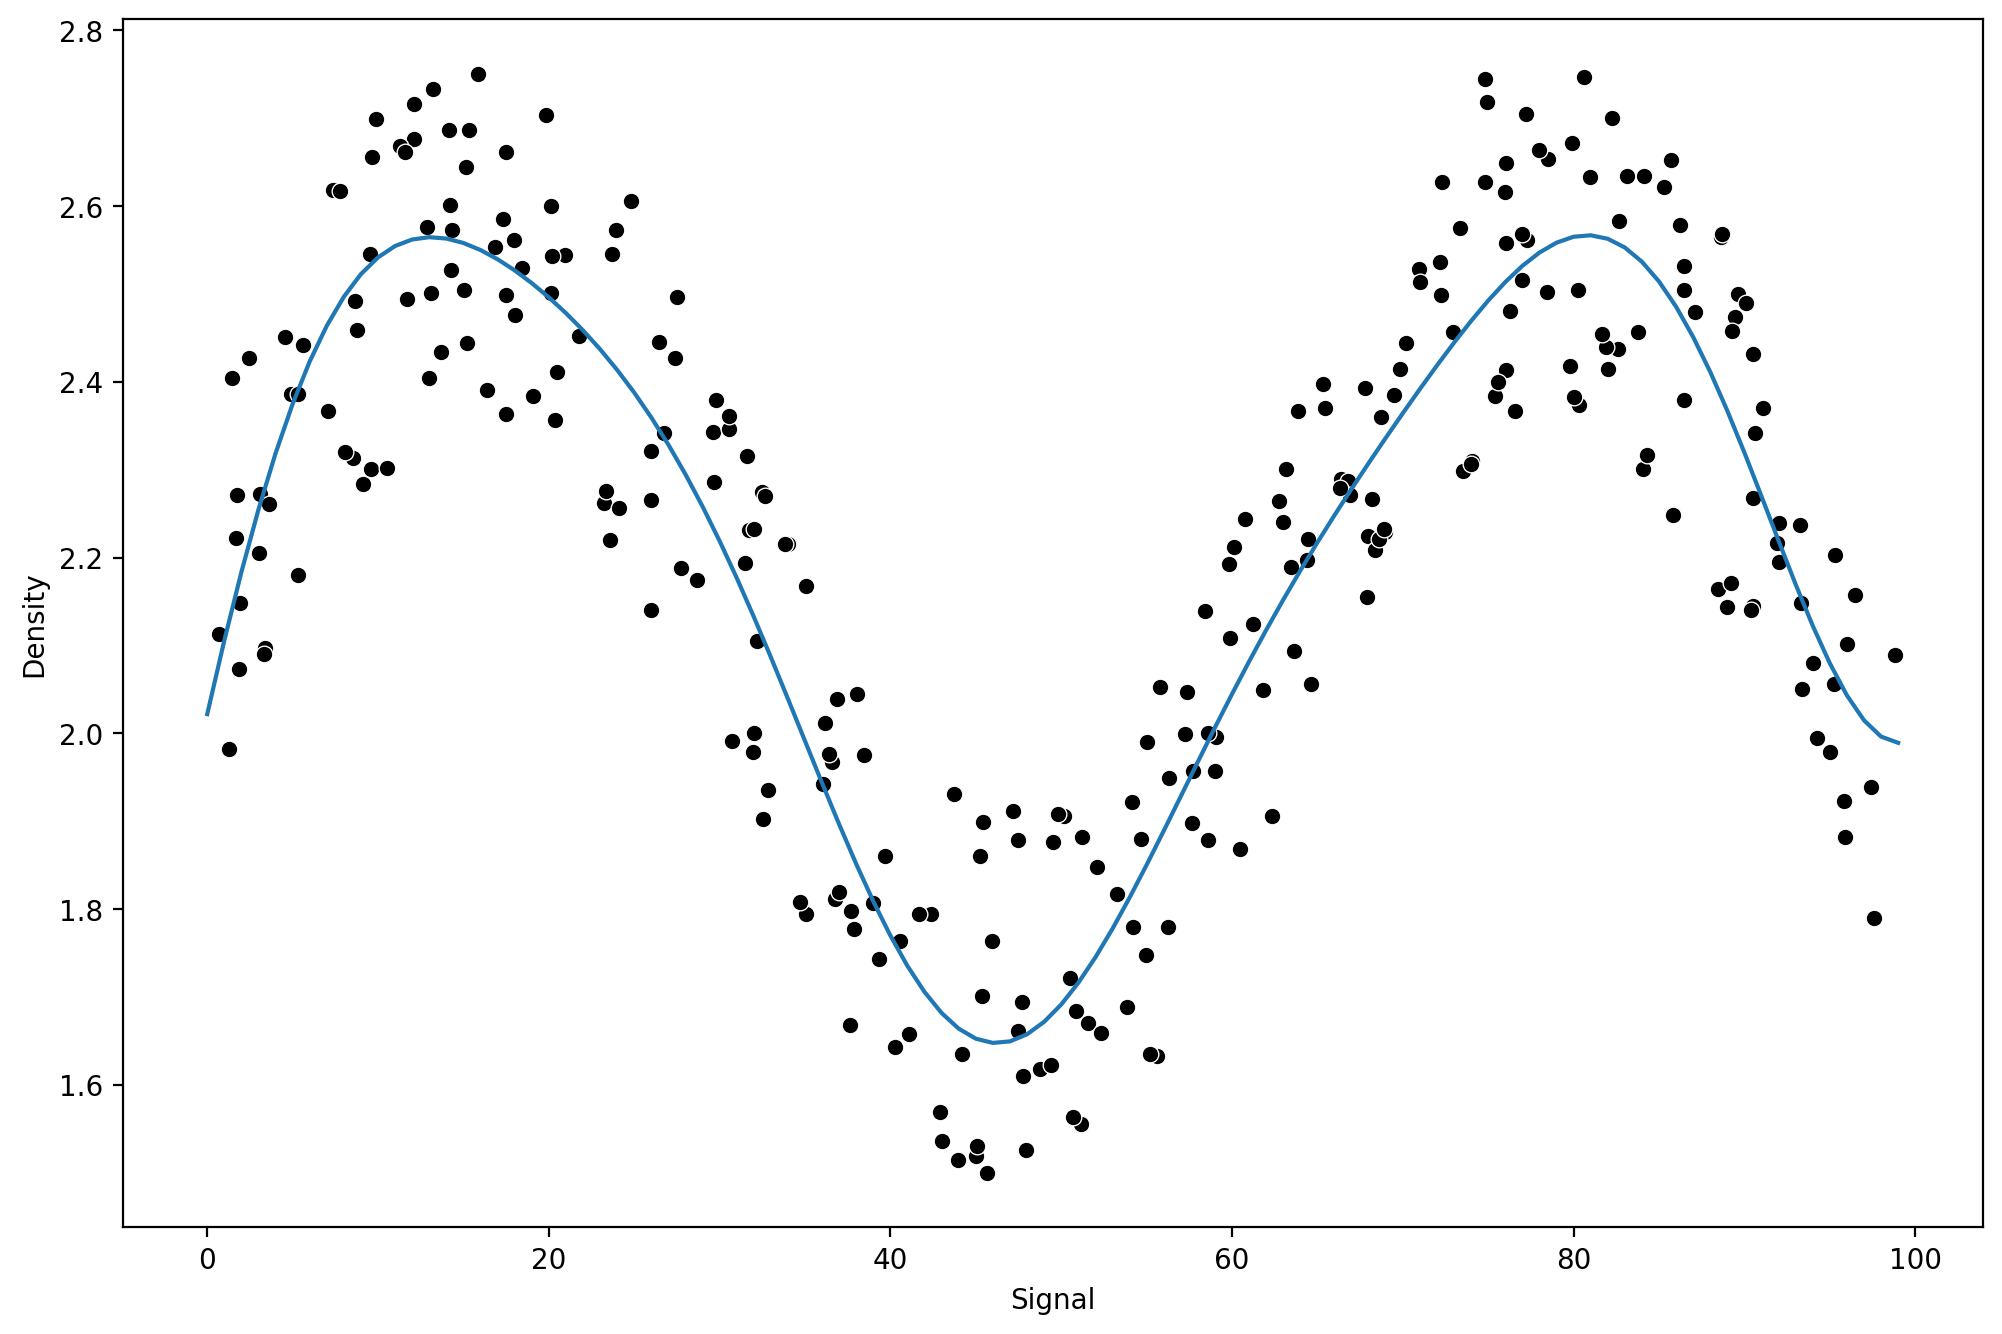

In [96]:
run_model(grid,X_train,y_train,X_test,y_test)

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rfr=RandomForestRegressor(n_estimators=10)

MAE:0.11750326219026917
RMSE:0.13736742600447413


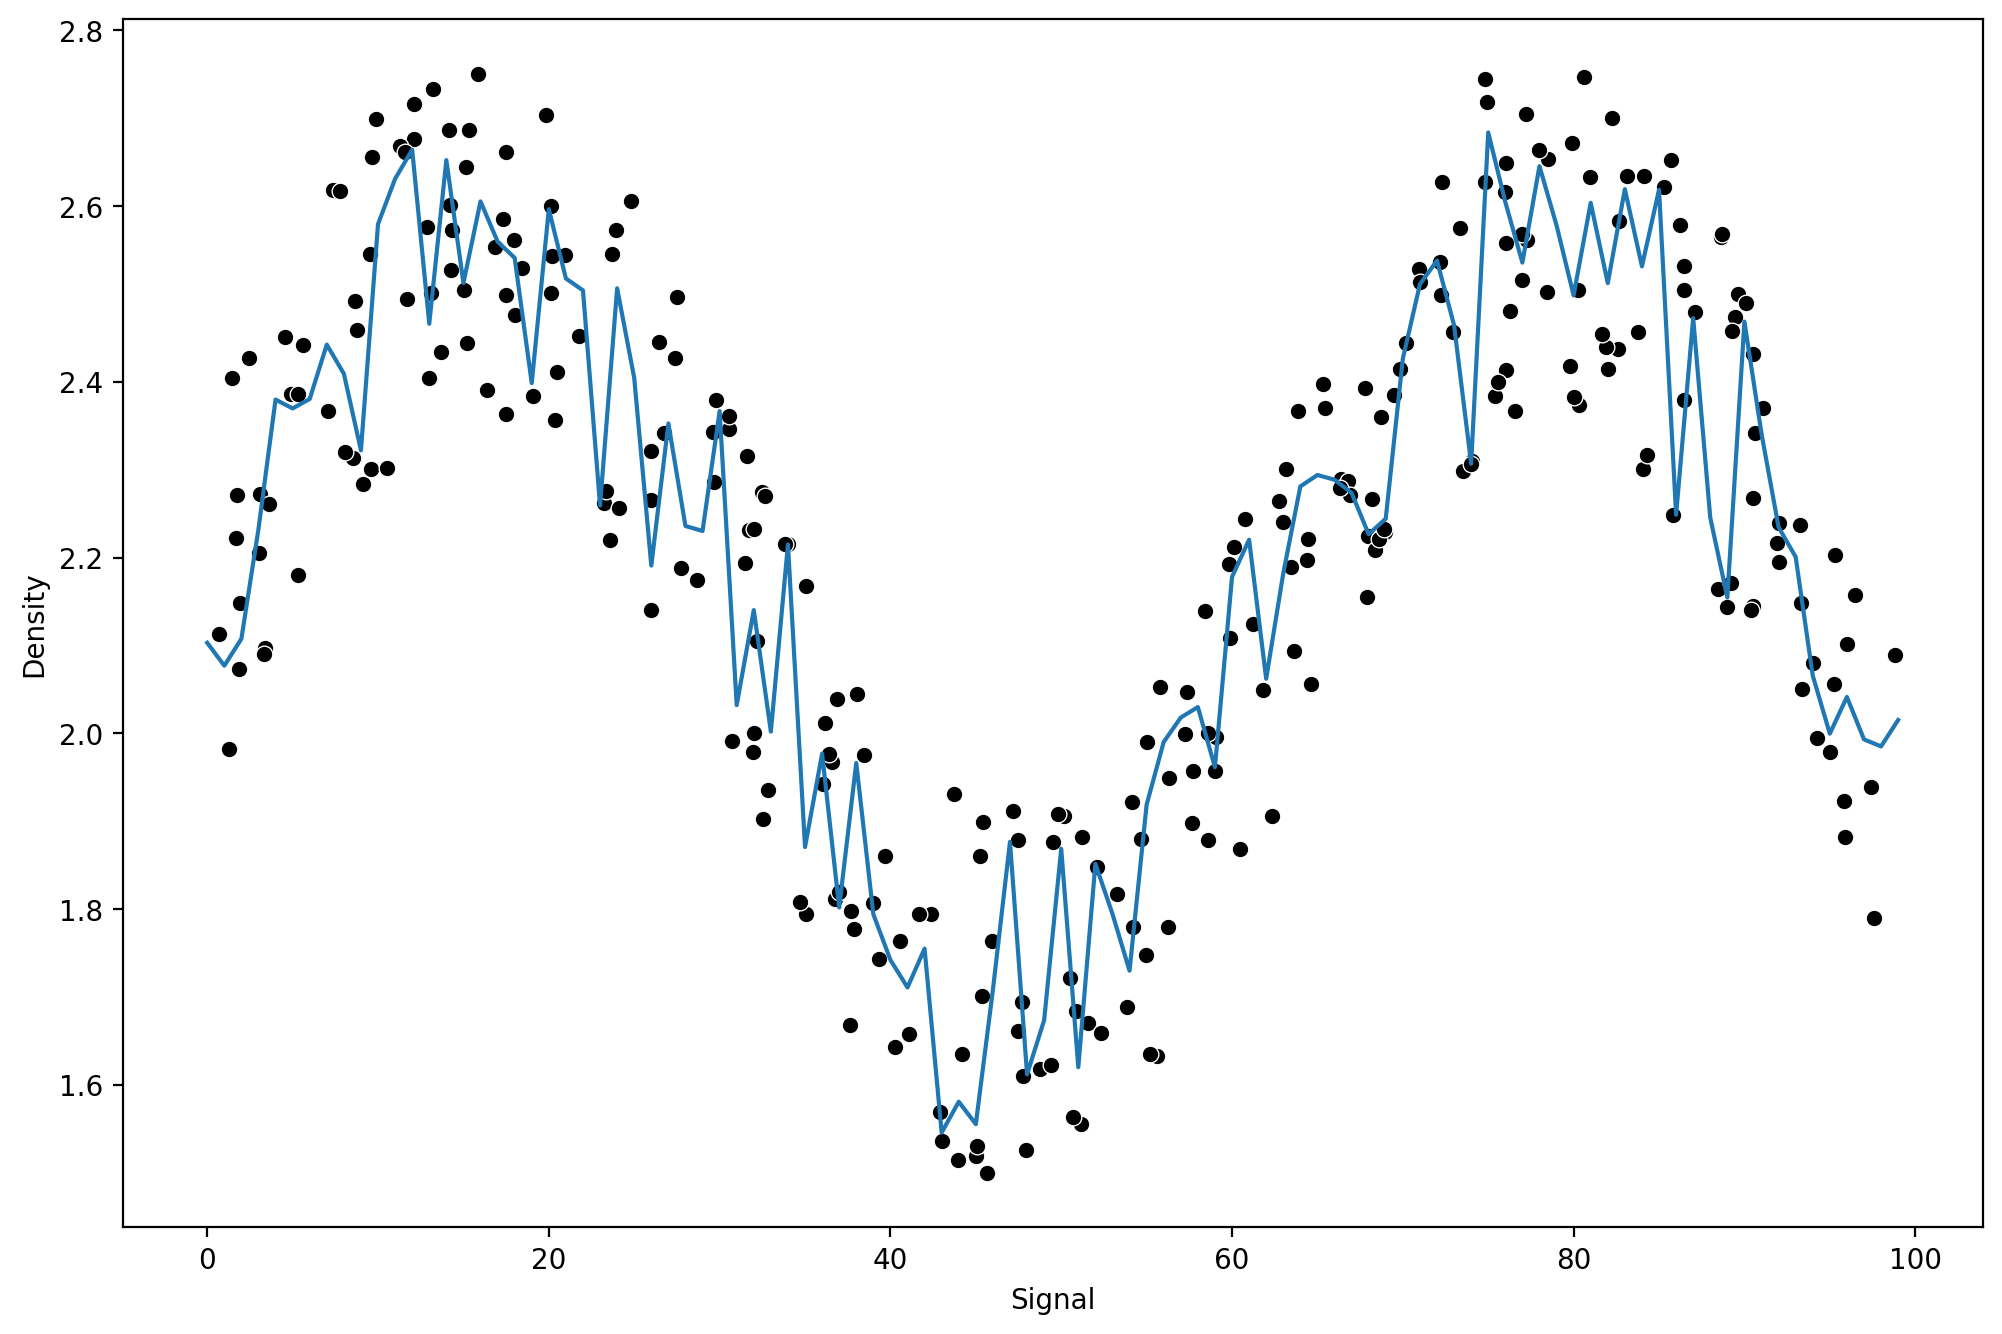

In [99]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [100]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [103]:
model=AdaBoostRegressor()

MAE:0.11712550462592201
RMSE:0.13469496768772105


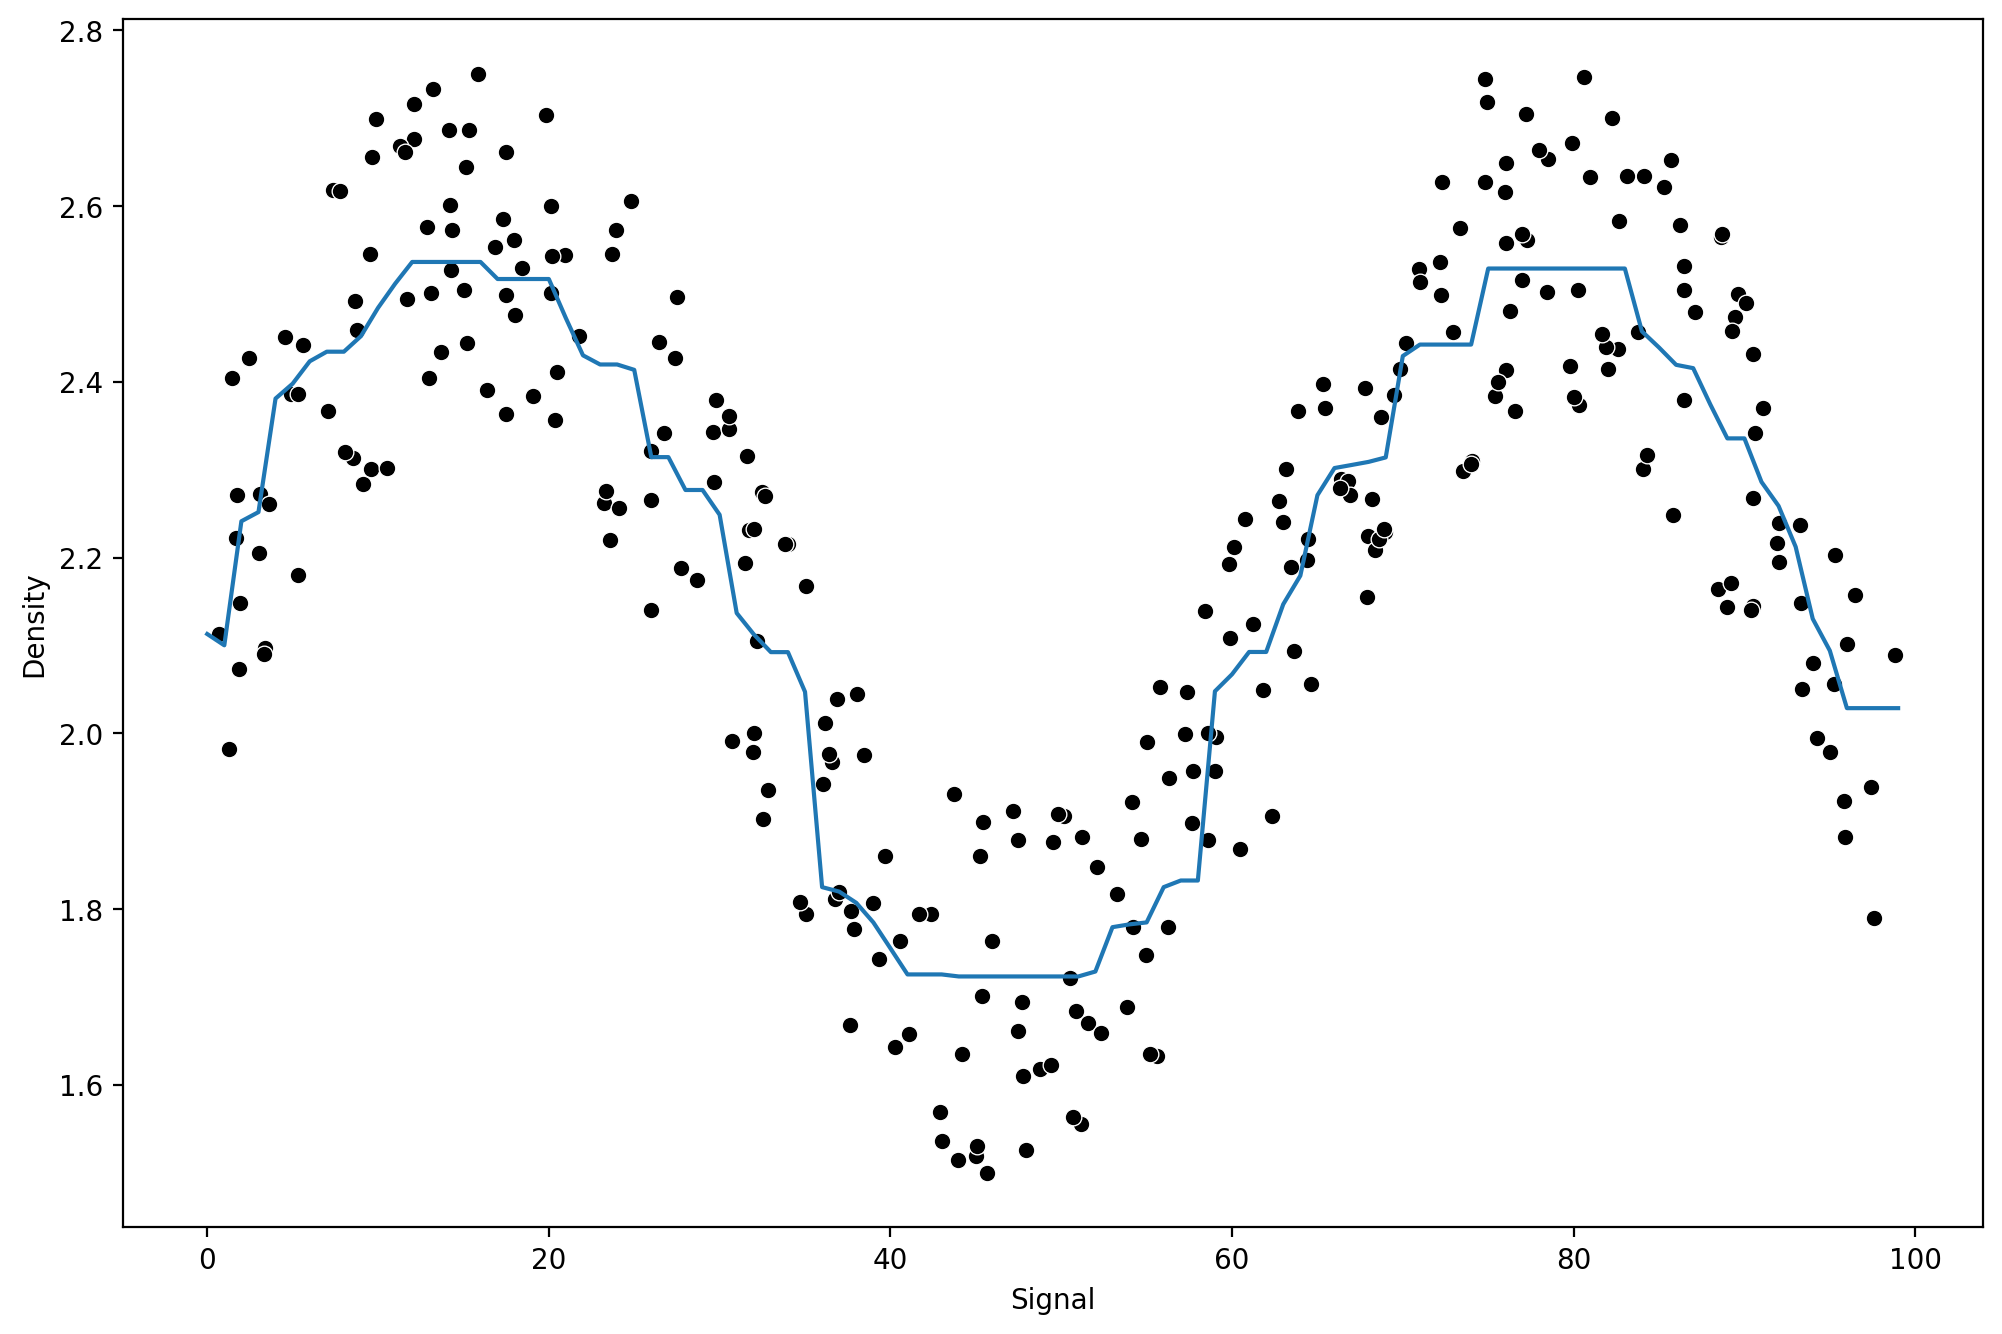

In [104]:
run_model(model,X_train,y_train,X_test,y_test)